## 宿題3

In [1]:
import numpy as np
import scipy as sp
from numpy.random import binomial
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
def mle_sim(N_MLE=100, N_BER=100, theta_true=0.3):
    mle_list = binomial(n=N_BER, p=theta_true, size = N_MLE)/N_BER

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('N_MLE$ = {0}$, N_BER$ = {1}$'.format(N_MLE, N_BER))
    ax.set_ylabel('freq')
    sns.distplot(mle_list, kde=False, rug=False, bins=25, axlabel="MLE")
    None

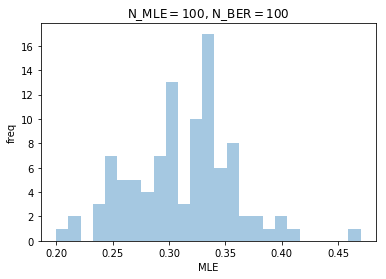

In [36]:
mle_sim(N_MLE=100, N_BER=100)

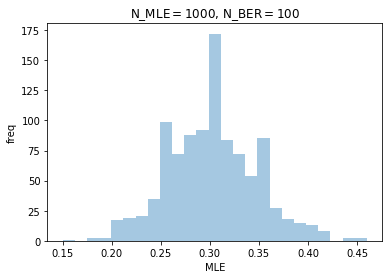

In [37]:
mle_sim(N_MLE=1000, N_BER=100)

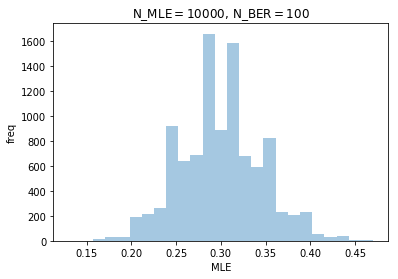

In [38]:
mle_sim(N_MLE=10000, N_BER=100)

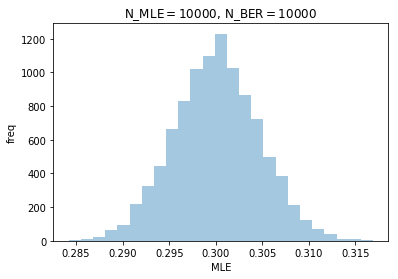

In [39]:
mle_sim(N_MLE=10000, N_BER=10000)

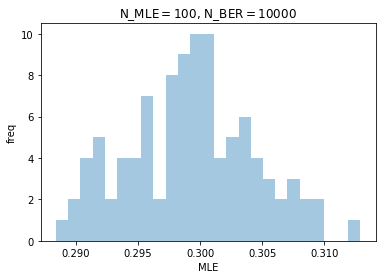

In [40]:
mle_sim(N_MLE=100, N_BER=10000)

In [14]:
import matplotlib.pyplot as plt
import scipy as sp

def hist(x, Bins = None): # ヒストグラムを出力
    from scipy.stats import norm
    if Bins is None:
        Bins = int(1+sp.log(len(x))/sp.log(2))
    a = plt.hist(x, bins=Bins)
    xAxis = list(a[1])
    width = a[1][1]-a[1][0]
    xAxis = xAxis+width/2
    mean = sp.mean(x)
    sd = sp.std(x)
    yAxis2 = norm.pdf(xAxis, loc=mean, scale=sd)*width*N
    plt.plot(xAxis, yAxis2, color='black')
    plt.show()

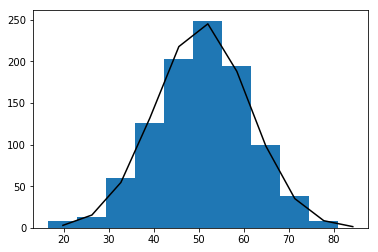

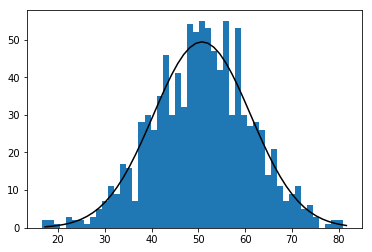

In [15]:
Mean = 50
SD = 10
N = 1000
# 平均 Mean, 標準偏差 SD の正規乱数を N 件生成
x = sp.random.normal(Mean, SD, N)
hist(x)
hist(x, Bins=50)

# HW4

## 宿題2

In [19]:
import numpy as np
import scipy as sp
from numpy.random import binomial, randn, rand
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
n_sample = 1000

In [3]:
np.random.seed(1)
x = randn(n_sample) + (rand(n_sample) > 0.3) * 4 - 2

In [4]:
x.shape

(1000,)

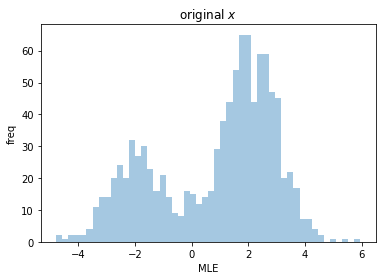

In [5]:
def plot_x(x):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('original $x$')
    ax.set_ylabel('freq')
    sns.distplot(x, kde=False, rug=False, bins=50, axlabel="MLE")
    None

plot_x(x)

In [11]:
import numpy as np
import scipy as sp
from numpy.random import randn, rand
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

np.random.seed(7)

n_sample = 1000
x = randn(n_sample) + (rand(n_sample) > 0.3) * 4 - 2

# number of gauss distributions
n_component = 5

L = - np.inf

# initial values
weights = np.ones(n_component) / n_component
means = np.linspace(np.min(x), np.max(x), n_component)
covs = np.ones(n_component)
eta = np.zeros([n_sample, n_component])

# main loop
n_iter = 0
while n_iter < 20:
    # E step
    for i in range(n_sample):
        for l in range(n_component):
            eta[i][l] = weights[l] * norm.pdf(x=x[i], loc=means[l], scale=covs[l])

    # M step
    for l in range(n_component):
        weights[l] = np.sum(eta[:,l]) / n_sample
        means[l] = np.dot(eta[:,l], x) / np.sum(eta[:, l])
        covs[l] = np.sqrt(np.dot(eta[:,l], (x - means[l])**2) / (1 * np.sum(eta[:,l])))

    # stop condition
    Lnew = np.sum(np.abs(eta))
    if np.sum(np.abs(Lnew - L)) < 0.00001:
        break
    else:
        L = Lnew

    n_iter += 1

# for debugging
print(n_iter)

n_sim = 20000
sim_x = np.zeros(n_sim)
for l in range(n_component):
    tmp = weights[l] * (covs[l] * randn(n_sim) + means[l])
    sim_x += tmp

12


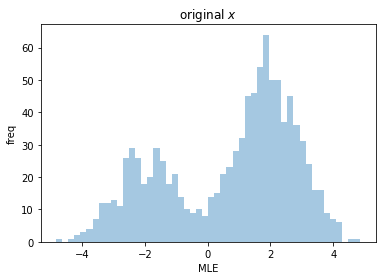

In [12]:
def plot_x(x, sim=False):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    if sim:
        ax.set_title('original $x$')
    else:
        ax.set_title('simulated $x$')
    ax.set_ylabel('freq')
    sns.distplot(x, kde=False, rug=False, bins=50, axlabel="MLE")
    None

plot_x(x)

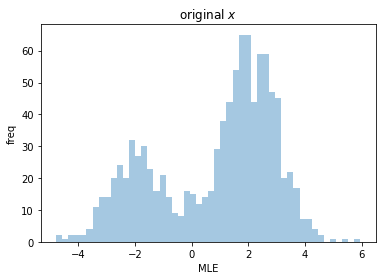

In [13]:
np.random.seed(1)
x = randn(n_sample) + (rand(n_sample) > 0.3) * 4 - 2
plot_x(x)

## Summary

In [1]:
def plot_x(x, sim=False):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    if sim:
        ax.set_title('simulated $x$')
    else:
        ax.set_title('original $x$')
    ax.set_ylabel('freq')
    sns.distplot(x, kde=False, rug=False, bins=50, axlabel="EM")
    None

In [2]:
import numpy as np
import scipy as sp
from numpy.random import randn, rand
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
def em_gauss_sim(n_sample=1000, n_component=5, iter_lim=20, seed=7):
    # set seed
    np.random.seed(seed)

    x = randn(n_sample) + (rand(n_sample) > 0.3) * 4 - 2

    L = - np.inf

    # initial values
    weights = np.ones(n_component) / n_component
    means = np.linspace(np.min(x), np.max(x), n_component)
    covs = np.ones(n_component)/10
    eta = np.zeros([n_sample, n_component])

    # main loop
    n_iter = 0
    while n_iter < iter_lim:
        # E step
        for i in range(n_sample):
            for l in range(n_component):
                eta[i][l] = (weights[l] * norm.pdf(x=x[i], loc=means[l], scale=np.sqrt(covs[l]))) / np.dot(weights, norm.pdf(x=x[i], loc=means, scale=np.sqrt(covs)))

        # M step
        means_prev = means.copy()
        weights_prev = weights.copy()
        covs_prev = covs.copy()
        for l in range(n_component):
            weights[l] = np.sum(eta[:,l]) / n_sample
            covs[l] = np.dot(eta[:,l], (x - means_prev[l])**2) / (1 * np.sum(eta[:,l]))
            means[l] = np.dot(eta[:,l], x) / np.sum(eta[:, l])

        # stop condition
        if np.sum((weights - weights_prev)**2) < 0.00001:
            break

        n_iter += 1

    # for debugging
    print(n_iter)
    
    sim_x = np.linspace(np.min(x), np.max(x), 1000)
    y = np.zeros_like(sim_x)
    for l in range(n_component):
        tmp = weights[l] * norm.pdf(x=sim_x, loc=means[l], scale=np.sqrt(covs[l]))
        y += tmp

    return x, sim_x, y, weights, means, covs, eta

In [4]:
x, sim_x, y, weights, means, covs, eta = em_gauss_sim()

10


In [98]:
np.sum(weights)

0.99999999999999989

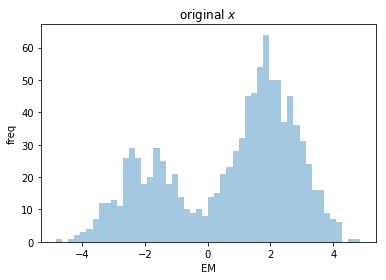

In [99]:
plot_x(x)

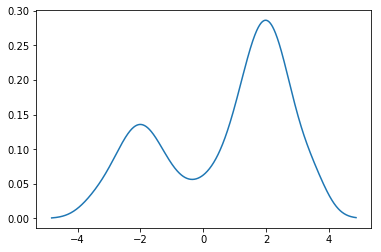

In [104]:
plt.plot(sim_x, y)

In [17]:
norm.pdf(x=0, loc=[-1,0,1], scale=[1,1,1])

array([ 0.24197072,  0.39894228,  0.24197072])

In [18]:
x, sim_x, weights, means, covs, eta = em_gauss_sim(n_component=4)

20


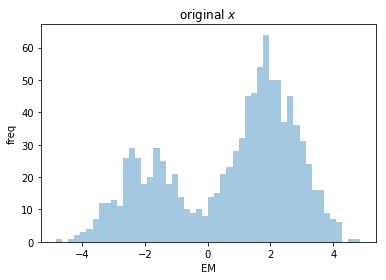

In [5]:
plot_x(x)

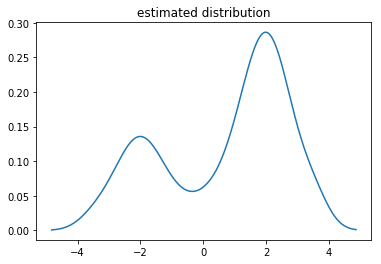

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('estimated distribution')
plt.plot(sim_x, y)

In [79]:
weights

array([ 0.01504239,  0.27043085,  0.15162828,  0.52673025,  0.03616822])

In [80]:
covs

array([ 0.24893817,  0.66615459,  1.24947299,  0.64202953,  0.21292107])

In [91]:
means

array([-3.49684991, -2.03759654,  0.59498556,  2.05110777,  3.5544404 ])

## Plot

In [82]:
x.shape

(1000,)

In [84]:
z = np.linspace(np.min(x), np.max(x), 1000)

In [88]:
y = np.zeros_like(z)

In [89]:
y += weights[0] * (covs[0] * norm.pdf(z - meansn[0]))

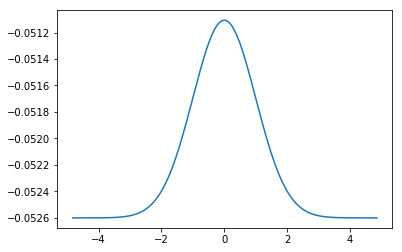

In [90]:
plt.plot(z, y)

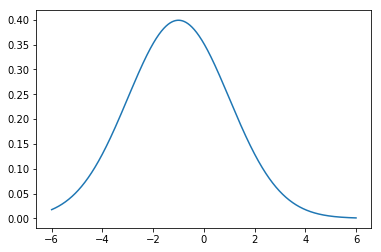

In [95]:
z = np.linspace(-6, 6, 1000)
y = 2 * norm.pdf(x=z, loc=-1, scale=2)
plt.plot(z, y)